##### Chen's Math Review Notes Series
# Basic Matrix Calculus
### Date: 01/07/2022

### Reference:

[Matrix Calculus 2020 04 16 for MIT Linear Algebra 18.06 Spring 2020 (Alan Edelman)](https://www.youtube.com/watch?v=oGZK3yGF-6k)

[Wikipedia](https://en.m.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities) (The 'Denominator layout' notation is the commonly used version.)

### Clarification:

The higher level matrix calculus (opposing to the basic level we are to demo below) is about the derivative of matrix-to-matrix functions, which will extends to the notion of tensor product/Kronecker product. For instance, computing the gradient of $ABC$ wrt $A$ (or $B,C$) is beyond the scope of this notes. The following review is quite sufficient for studying general deep learning concepts.

### I. Matrix/Vector Properties we need

#### I.1 Basics

A gentle beginning: Recall from scalar calculus: Let $y=f(x)$, then, if we can find $dy=D(x)dx$ for some function $D(x)$, $D(x)$ is exactly the derivative of $y$ wrt $x$. The same thing applies to matrix calculus.

Another worthwhile refresher is *point derivation*: Let $y=f(x)g(x)$, then $\frac{d y}{d x}=\frac{\partial f}{\partial x}dg+\frac{\partial g}{\partial x}df$ (or equivalently, $dy=gdf+fdg$). This verifies this, if $y=x^2$, then $dy=x \cdot dx + x \cdot dx = 2x dx$, which is saying $2x$ is the derivative of $y$. By the same token, we need to know the *vector(matrix) product rule*: 
$$d(AB)=(dA)B+A(dB)$$

Note: the (actually geometric) meaning of $d \mathbf{A}$ if $A$ is an m-n-matrix: $d \mathbf{A}$ is a small perturbation matrix with **same dimention** m-by-n. In addition, $d(A^{\top})=d(A)^{\top}$.

At last, we review a property of matrix transpose: $(A_1 A_2...A_n)^{\top} = A_n^{\top} A_{n-1}^{\top}...A_{1}^{\top}$, as long the matrix multiplication $A_1 A_2...A_n$ is valid. $A_i$ are not necessarily square and can be row/column vectors.

**Ex 1:**
$y=\mathbf{x}^{\top}\mathbf{x}$. Write

$$
\begin{aligned}
dy &=x^{\top} dx + (dx)^{\top} x &\text{(point derivation)}\\
&=x^{\top} dx + x^{\top} dx &\text{(commutatitity of vector inner product)}\\
&=(2x)^{\top} dx
\end{aligned}
$$

    
Hence we get that $2x$ is the derivative of $y$ wrt $x$.


#### I.2 Trace

Trace is the sum of elements on the main diagonal of a square matrix.

Trace of a (everything multiplier matrix here is not necessarily square, though only squared matrices have trace) matrix product is *cyclic*, i.e. $tr(ABC)=tr(BCA)=tr(CAB)$, as long as the matrix multiplications are valid. 

Also, note that the trace of a scalar is itself. Hence a useful trick is to **trace-ify** a scalar when computing the gradient of a **scalar-valued** function.

The above facts about trace will help us get the form $(D)^{\top}dA$ and so as to let us find the gradient $D$.

Another useful fact about trace(for numerical usage sometimes): If we can write a scalar $c$ as the product of a series matrics, then we may trace-ify the scalar and use cyclic property to obtain the form $c= tr(M^{\top}A)$ for some matrices $M, A$ who share the same dimension. Then,

$$c=tr(M^{\top}A)=\text{sum}(M \odot A),$$ where `sum` function computes the the sum of all entries of a matrix.

At last, we introduce the the trace properties regarding the gradient of a scalar-valued function. 

(1) For some function $f: \mathbb{R}^{m \times n} \rightarrow \mathbb{R}$. if we can write $df(A) = \text{trace}((D)^{\top} dA)$ for some matrix A, then $D$ is the gradient of $f$ wrt $A$. <br>
(2) $d \text{trace}(F) = \text{trace} (dF)$.

There are a miscellaneous easy-to-see properties, such as $c  \text{trace}(A)= \text{trace}(cA), \text{trace}(A) = \text{trace}(A)+\text{trace}(B), \text{trace}(A^{\top})=\text{trace}(A)$. We may refer to [wiki](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

**Ex 2:**
$c=x^{\top}A y$. Write

$$
\begin{aligned}
x^{\top}A y &=\text{trace}(x^{\top}A y)  &\text{(trace-ify a scalar)}\\
&=\text{trace}(y x^{\top}A) &\text{(cyclic property)}\\
&=\text{trace}((xy^{\top})^{\top}A) \\
&=\text{sum}((xy^{\top}) \odot A)  &\text{(the second property of trace mentioned above)}\\
\end{aligned}
$$



**Ex 3:**
Let us compute the gradient of $y=trace(A^2)$ for a square matrix $A$.

$$
\begin{aligned}
dy &=\text{trace}(d(A^2)) &\text{(trace gradient property (2))}\\
&=\text{trace}(AdA+(dA) A) &\text{(point derivation)}\\
&=\text{trace}(AdA)+\text{trace}((dA) A) &\text{NOTE: $AdA \neq (dA) A$}\\
&=\text{trace}(AdA)+\text{trace}(A(dA)) &\text{(cyclic property)}\\
&=\text{trace}(2AdA)\\
&=\text{trace}((2A^{\top})^{\top}dA)\\
\end{aligned}
$$

Using trace gradient property (1) we know the gradient of $y$ is simply $2A^{\top}$.

### II. Case Study: Gradient of Ordinary Least Square Loss

**Ex 4:**Compute $\nabla_x \|Ax-b\|^2$.
$$
\begin{aligned}
d (Ax-b)^{\top}(Ax-b) &=(Adx)^{\top}(Ax-b)+(Ax-b)^{\top}(Adx) &\text{( $d(Ax-b)=Adx$)}\\
&=2(dx)^{\top}A^{\top}(Ax-b) &\text{(commutativity of inner product)}\\
&=(2A^{\top}(Ax-b))^{\top}dx \\
\end{aligned}
$$

Hence $\nabla_x \|Ax-b\|^2=2A^{\top}(Ax-b)$.

**Ex 5:**
Compute $\nabla_A \|Ax-b\|^2$.
$$
\begin{aligned}
d (Ax-b)^{\top}(Ax-b) &=(dAx)^{\top}(Ax-b)+(Ax-b)^{\top}(dAx) &\text{( $d(Ax-b)=dAx$)}\\
&=2(Ax-b)^{\top}dAx &\text{(commutativity of inner product)}\\
&=2 \text{trace}((Ax-b)^{\top}dAx)  &\text{(trace-ify a scalar)}\\
&=2 \text{trace}(x(Ax-b)^{\top}dA)   &\text{(cyclic property of trace)}\\
&= \text{trace}((2(Ax-b)x^{\top})^{\top}dA) \\
\end{aligned}
$$

Hence $\nabla_A \|Ax-b\|^2=2(Ax-b)x^{\top}$.

### III. 'Gradient' or 'Jacobian'?
We care about computing the derivative of a differentiable function $f: X \rightarrow Y$. 

If $f$ is a **scalar-valued** function, i.e. $f$ is **matrix-to-scalar** (NOTE: matrices includes vectors and scalars), the derivative is called "GRADIENT".

If $f$ is a **vector-to-vector** function (NOTE: vectors includes scalars),  the derivative is called "JACOBIAN". Let $f: \mathbb{R}^m \rightarrow \mathbb{R}^n $, the Jacobian matrix has dimension m-by-n. Jacobian matrix's entries are formally computed as $$J_{i,j} = \frac{\partial f_i}{x_i},$$ and alternatively, $df = Jdx$. 
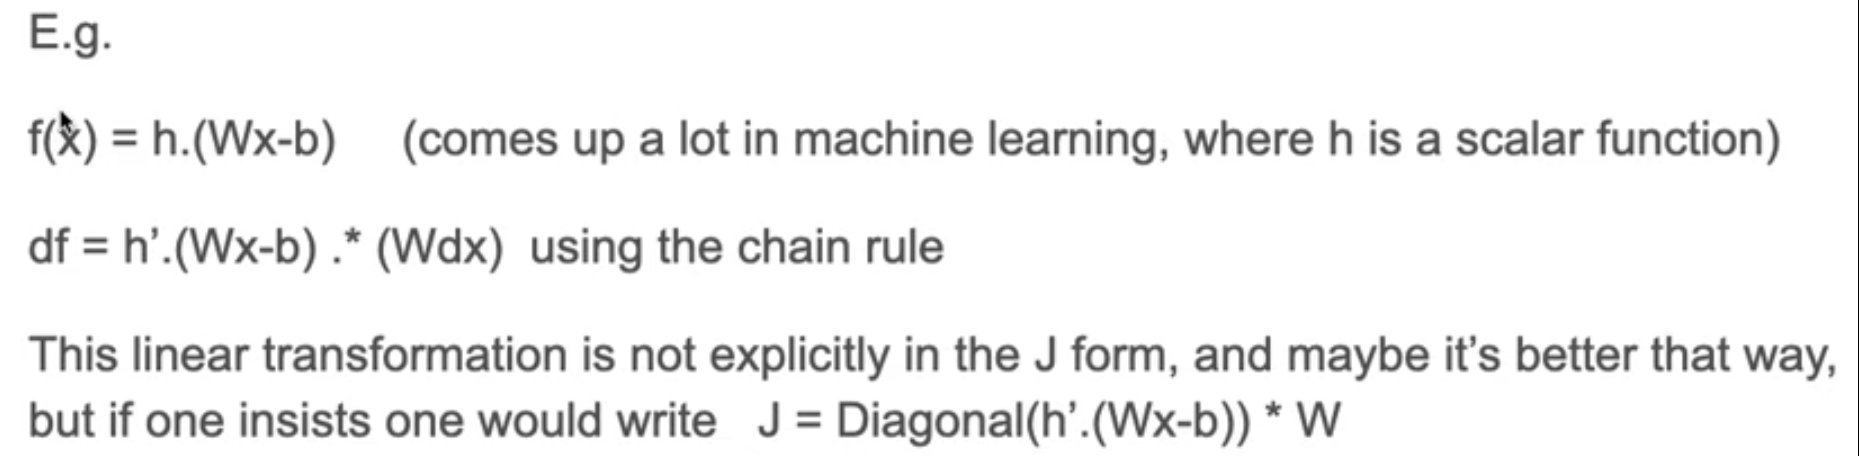
Another equivalent definition to write Jacobian matrix is to relate the notion to gradients:

$$J=[\nabla_x^{\top}f_1,\nabla_x^{\top}f_2,...\nabla_x^{\top}f_m]^{\top}.$$

It is easy to find that, **if the image space is scalars, Jacobian matrix is precisely the transpose of the gradient vector.** Why transpose? Because in this case the Jacobian matrix is reduced to a row vector, by its definition!

**A BIG WARNING of confusion**: In front of an arbitrary **vector-to-vector** function, some people call the transpose of the Jacobian as the Gradient of the function! [Check this!](https://math.stackexchange.com/questions/3285670/how-derivative-of-matrix-leads-to-its-transpose)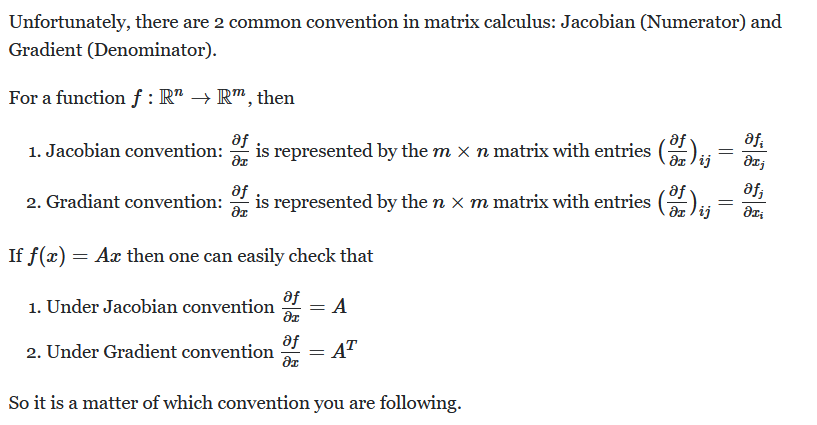

**Ex 6:** Let $f$ be a vector-to-scalar function and $g$ be a vector-to-vector function, and let $L=f(y),y=g(z)$.

We have multivariate chain rule stating $\frac{\partial L}{\partial z} = (\frac{\partial y}{\partial z})(\frac{\partial L}{\partial y})$, where we use $\frac{\partial a}{\partial b}$ to represent gradient (in the general sense!). In this case, we can write $\frac{\partial L}{\partial z} = J^{\top}(\frac{\partial L}{\partial y})$, where $J$ is the Jacobian matrix of $g$.

### IV. Insights & Takeaways
(a) We always want to avoid computing gradients in the element-by-element wise. (We have Autodiff in Python. Facing large-scale matrices/vectors, we have SGD.) But, it import to understand the derivation of the gradients above-stated. <br>
(b) $\partial f/\partial x$ usually means gradient but it can also represent Jacobian. Heed this (chaotic) usage of the notation in specific contexts. A brief summany: $df=Jdx=\nabla^{\top}dx$.<br>
(c) **Do not** bother to memorize the exact matrix formula of gradient/jacobian. Their properties are more valuable.